# Лабораторная работа по заданию №  5. Алгоритмы на графах. Введение в графы и основные алгоритмы на графах

In [1]:
import numpy as np
import networkx as nx

### Генерация матрицы смежности

In [41]:
N = 10
gamma = 0.7
adjacency_matrix_pre=np.triu((np.random.random_sample(size=(N,N))<gamma).astype(np.int32))
adjacency_matrix = adjacency_matrix_pre + np.triu(adjacency_matrix_pre,1).T
np.fill_diagonal(adjacency_matrix, 0)
print(adjacency_matrix)

[[0 1 0 1 1 1 1 1 1 0]
 [1 0 0 1 1 1 1 1 1 1]
 [0 0 0 1 1 1 0 1 0 1]
 [1 1 1 0 1 0 0 1 1 1]
 [1 1 1 1 0 1 1 1 0 0]
 [1 1 1 0 1 0 0 1 1 1]
 [1 1 0 0 1 0 0 0 1 0]
 [1 1 1 1 1 1 0 0 0 1]
 [1 1 0 1 0 1 1 0 0 1]
 [0 1 1 1 0 1 0 1 1 0]]


### Приведение матрицы смежности к графу

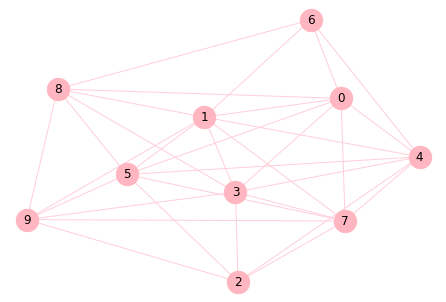

In [43]:
G=nx.from_numpy_matrix(adjacency_matrix)
nx.draw(G, node_size=500,  with_labels=True, node_color='#FFB6C1', width=1, edge_color='#FFCFDB')

### Прведение графа к списку смежности

In [45]:
adjacency_list=nx.convert.to_dict_of_lists(G)
print(adjacency_list)

{0: [1, 3, 4, 5, 6, 7, 8], 1: [0, 3, 4, 5, 6, 7, 8, 9], 2: [3, 4, 5, 7, 9], 3: [0, 1, 2, 4, 7, 8, 9], 4: [0, 1, 2, 3, 5, 6, 7], 5: [0, 1, 2, 4, 7, 8, 9], 6: [0, 1, 4, 8], 7: [0, 1, 2, 3, 4, 5, 9], 8: [0, 1, 3, 5, 6, 9], 9: [1, 2, 3, 5, 7, 8]}


### Определение функций обхода графа в ширину и в глубину

In [48]:
def bfs(adg_list, first_edge, second_edge):
    for edge in adg_list[first_edge]:
        if edge!=second_edge:
            print(edge)
        
bfs(adjacency_list, 0, 1)

3
4
5
6
7
8
